# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Feature Selection

Dropping features w/o a strong correlation to target

**Correlation Matrix**

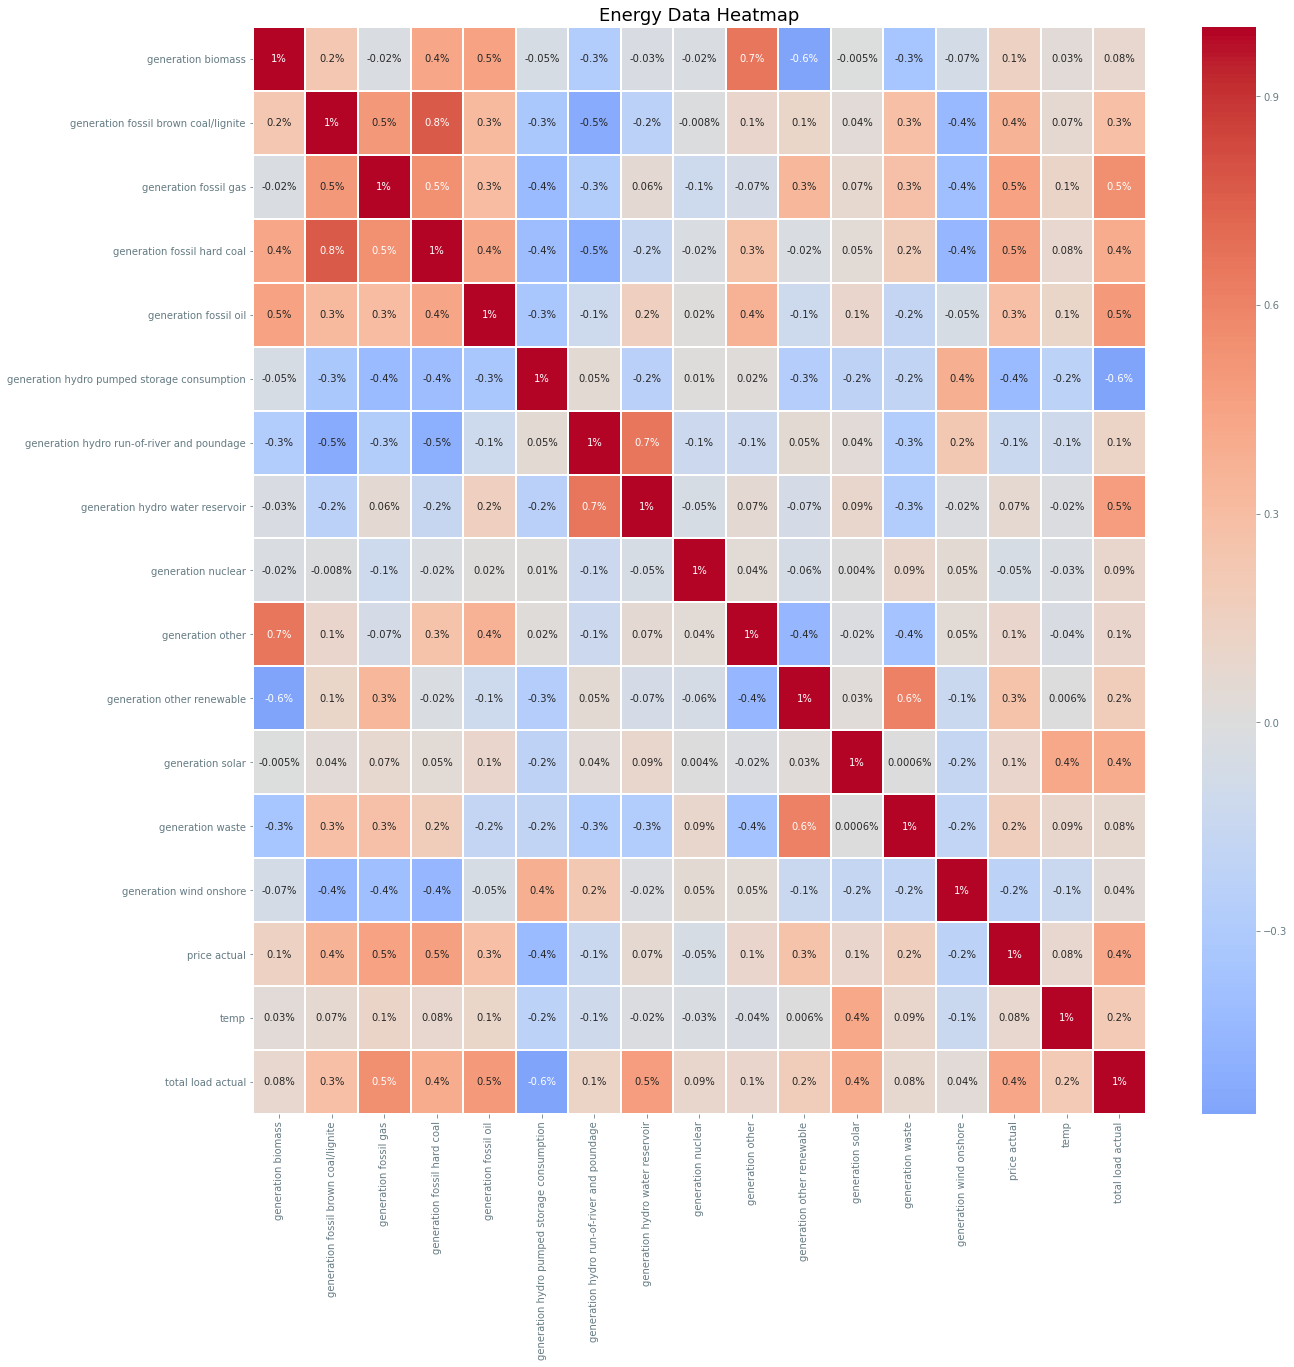

In [5]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

**Dropping cols with <.4 and >-.4 correlation with target**

In [6]:
#Create corr
corr = df.corr()

#Capture features with a strong corr w/ target
features = corr['price actual'][(corr['price actual'] < -.4 )| (corr['price actual'] > .4 )].index
df = df[features]

#Check
df.head()

,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Data Preparation for Mulitvariate Analysis

### Multivariate Analysis Tests

**Granger's Test of Causality**

In [7]:
#Import Granger's test
from Time_Series_Tests import grangers_causation_matrix

#Fit to data(excluding additiona features pertaining to price actual)
grangers_causation_matrix(df,variables=df.columns)

,generation fossil gas_x,generation fossil hard coal_x,generation hydro pumped storage consumption_x,price actual_x,total load actual_x
generation fossil gas_y,1.0,0.0,0.0,0.0,0.0
generation fossil hard coal_y,0.0,1.0,0.0,0.0,0.0
generation hydro pumped storage consumption_y,0.0,0.0,1.0,0.0,0.0
price actual_y,0.0,0.0,0.0,1.0,0.0
total load actual_y,0.0,0.0,0.0,0.0,1.0


**Cointegration Test**

In [8]:
#Import cointegration test
from Time_Series_Tests import cointegration_test

#Fit to data(excluding additiona features pertaining to price actual)
cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
generation fossil gas ::  4449.25   > 60.0627   =>   True
generation fossil hard coal ::  1846.85   > 40.1749   =>   True
generation hydro pumped storage consumption ::  877.82    > 24.2761   =>   True
price actual ::  322.5     > 12.3212   =>   True
total load actual ::  12.57     > 4.1296    =>   True


### Make Data Stationary

Price actual has already been made stationary

In [9]:
#Read in libraries
from statsmodels.tsa.seasonal import seasonal_decompose

#Write for loop that fits decomposition model to each feature
for col in df.columns:
    result = seasonal_decompose(df[col], model = 'add', freq=24)
    #Store trend and seasonal component of each featuire to df
    df[col +' season'] = result.seasonal
    df[col +' trend'] = result.trend   
    #Make target stationary by subtracting seasonality and trend components from feature
    df[col + ' stationary'] = df[col] - df[col+' season'] - df[col + ' trend']

#Sort df alphabetically and drop na   
df = df.reindex(sorted(df.columns), axis =1)
df.dropna(inplace = True, axis = 0)

#Check
display(df.head())

,generation fossil gas,generation fossil gas season,generation fossil gas stationary,generation fossil gas trend,generation fossil hard coal,generation fossil hard coal season,generation fossil hard coal stationary,generation fossil hard coal trend,generation hydro pumped storage consumption,generation hydro pumped storage consumption season,generation hydro pumped storage consumption stationary,generation hydro pumped storage consumption trend,price actual,price actual season,price actual stationary,price actual trend,total load actual,total load actual season,total load actual stationary,total load actual trend
date_time,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,383.381984,-821.652818,4222.270833,4220.0,181.521023,-134.521023,4173.000000,972.0,-238.648681,131.336181,1079.3125,60.12,3.750959,-5.750750,62.119792,24133.0,2352.743184,-2151.597351,23931.854167
2015-01-01 13:00:00,3754.0,402.106788,-788.106788,4140.000000,4404.0,219.642515,159.169985,4025.187500,922.0,-269.700629,81.075629,1110.6250,62.05,3.292118,-3.198368,61.956250,24713.0,2856.356263,-2121.835430,23978.479167
2015-01-01 14:00:00,3779.0,363.470608,-633.241441,4048.770833,4256.0,220.103358,159.104975,3876.791667,941.0,-254.936512,30.936512,1165.0000,62.06,2.675646,-2.233563,61.617917,24672.0,3004.248460,-2332.248460,24000.000000
2015-01-01 15:00:00,3708.0,299.567702,-568.192702,3976.625000,4038.0,198.556871,101.672295,3737.770833,1069.0,-215.064849,50.314849,1233.7500,59.76,1.874951,-3.437243,61.322292,23528.0,2840.023129,-3348.148129,24036.125000
2015-01-01 16:00:00,3813.0,254.578554,-363.724387,3922.145833,4191.0,159.866135,415.279699,3615.854167,970.0,-162.463163,-168.099337,1300.5625,61.18,1.011884,-1.000426,61.168542,23118.0,2473.497661,-3455.914328,24100.416667


### Test for Stationarity

**ADF and KPSS Test**

In [10]:
#Read in ADF and KPSS tests
from Time_Series_Tests import ADF_KPSS_test

#Apply tests to each stationary featuire in df
for col in df.filter(regex = 'stationary').columns:
    print('Results for {}\n'.format(str.title(col)))
    ADF_KPSS_test(df[col],0)

Results for Generation Fossil Gas Stationary

ADF Statistic: -42.97157575204435
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0008694208619115929
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Fossil Hard Coal Stationary

ADF Statistic: -42.46511619235939
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0009941876691073447
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Hydro Pumped Storage Consumption Stationary

ADF Statistic: -45.26546840513934
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0011217945273589555
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.4

## Data Preparation for Univariate Analysis

**Target Investigation**

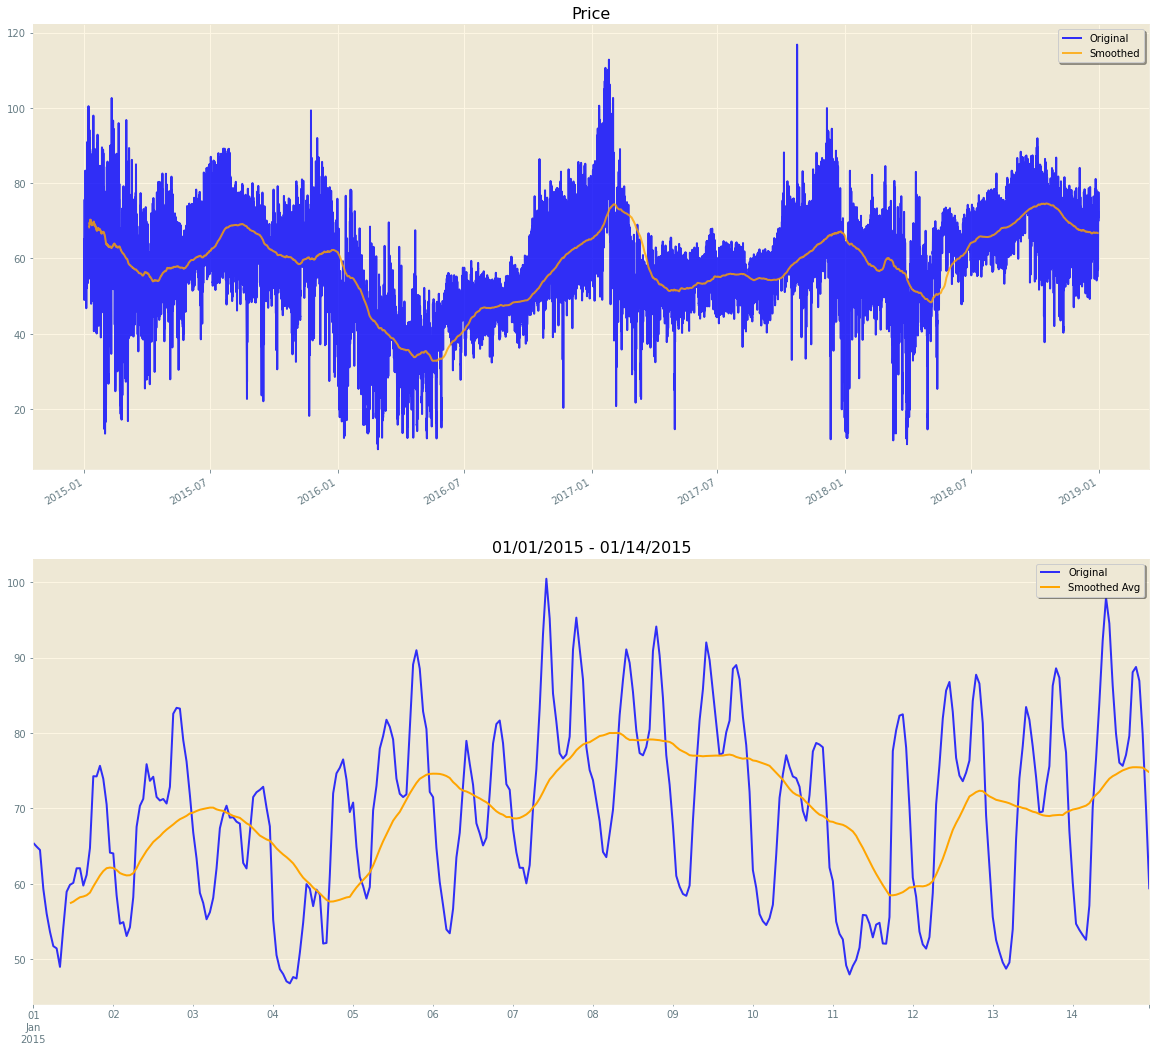

In [11]:
Image(filename= eda_path + '/Target_Plot.png', height=1300, width=1500)

**ARMA Parameters**

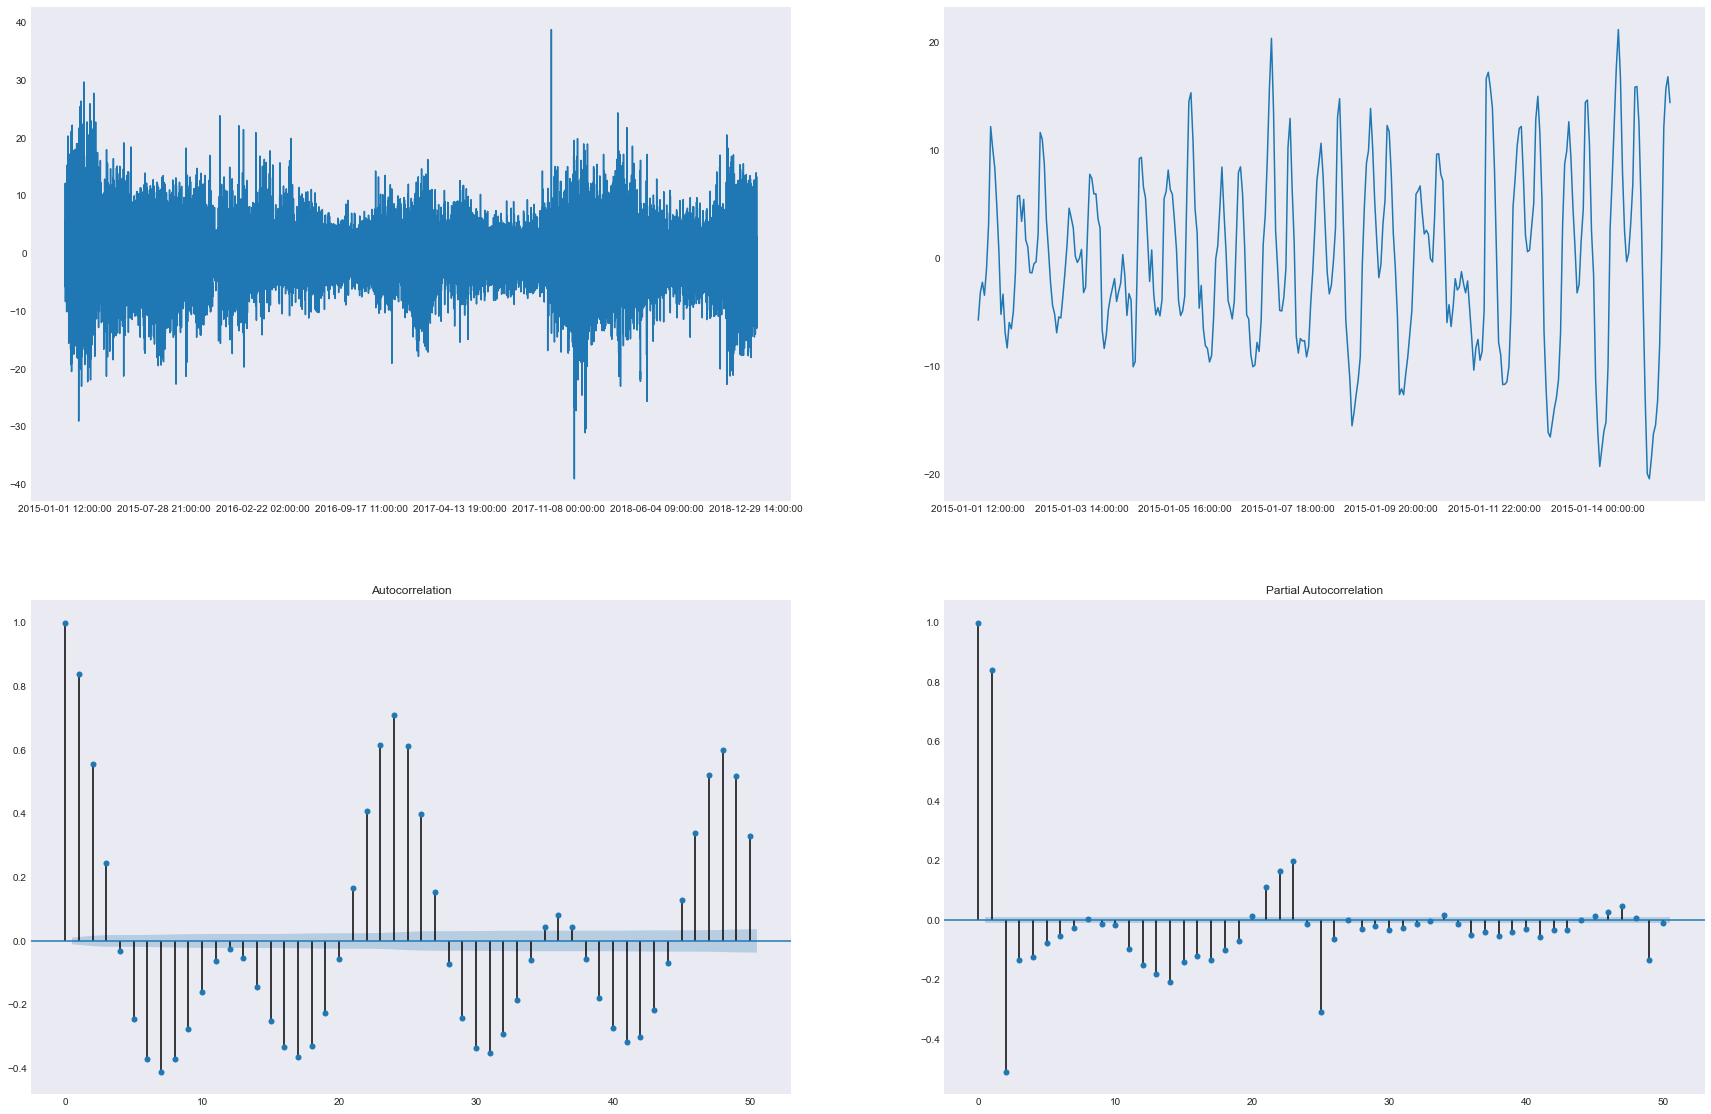

In [12]:
#Read in libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from TimeseriesPlotter import timeseries_plot

#Create plot
f, ax  = plt.subplots(2,2,figsize=(30,20))

#Plot Raw stattionary data and Stationary Data with zoom
timeseries_plot(df['price actual stationary'], ax = ax[0,0])
timeseries_plot(df['price actual stationary'][:24*14], ax = ax[0,1])

#Plot PACF and ACF
plot_acf(df['price actual stationary'], ax = ax[1,0], lags = 50)
plot_pacf(df['price actual stationary'], ax = ax[1,1], lags = 50);

#Export plot
plt.savefig(viz_path + '/stationary_target_PACF_ACF.png',bbox_inches='tight')

## Prepare data for XGBoost

In [37]:
#Create boosting df for univariate analysis
xg_df = pd.DataFrame(df['price actual stationary'], )

xg_df.reset_index(inplace = True)
xg_df[['date','time']] = xg_df.date_time.str.split(' ', expand = True)

###Extract features from date###
xg_df.date =pd.to_datetime(xg_df.date)
xg_df['year']=xg_df.date.dt.year
xg_df['month']=xg_df.date.dt.month_name()
xg_df['week_number_year']=xg_df.date.dt.week
xg_df['weekday']=xg_df.date.dt.day_name()
xg_df['day']=xg_df.date.dt.day
xg_df['is_weekend']= xg_df['weekday'].apply(lambda x: True if (x == 'Saturday')|( x=='Sunday') else False)

#Check for holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#Init calendar
cal = calendar()
holidays = cal.holidays(start = xg_df['date'].min(), end=xg_df['date'].max())

#Add holiday flair
xg_df['holiday'] = xg_df['date'].isin(holidays)

xg_df.set_index('date_time', inplace=True)
###Add lag features##
lags = np.arange(1, 25)
for i in lags:
    xg_df['lag_{}'.format(str(i))] = xg_df['price actual stationary'].shift(i)

In [40]:
#Add stationary features
extra_features = df.filter(regex = 'stationary').drop(['price actual stationary'], axis =1)
xg_df = pd.concat((extra_features, xg_df), axis = 1)

#Drop na(only after concatenation)
xg_df.dropna(inplace = True)

In [42]:
#Drop extra cols
xg_df.drop(['date'],axis=1, inplace=True)

In [43]:
#Check
print(xg_df.shape)
display(xg_df.head())

(35022, 37)


,generation fossil gas stationary,generation fossil hard coal stationary,generation hydro pumped storage consumption stationary,total load actual stationary,price actual stationary,time,year,month,week_number_year,weekday,day,is_weekend,holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02 12:00:00,-1330.798651,-93.083523,-424.601319,-501.659851,1.053625,12:00:00,2015,January,1,Friday,2,False,False,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563,-3.198368,-5.750750
2015-01-02 13:00:00,-1325.231788,-140.121682,-315.382704,-577.752096,-1.327743,13:00:00,2015,January,1,Friday,2,False,False,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563,-3.198368
2015-01-02 14:00:00,-1258.824775,-135.832525,-152.355154,-874.248460,-1.368354,14:00:00,2015,January,1,Friday,2,False,False,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563
2015-01-02 15:00:00,-1359.817702,-178.931871,286.064849,-1930.856462,-0.505576,15:00:00,2015,January,1,Friday,2,False,False,-1.368354,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243
2015-01-02 16:00:00,-945.411887,-258.720301,745.129830,-2171.601828,-0.341468,16:00:00,2015,January,1,Friday,2,False,False,-0.505576,-1.368354,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426


## Split data into training and test sets

XBR split

In [44]:
#Print final shape of df and display
print('Final shape of xgbr data:', xg_df.shape)
display(xg_df.head())

Final shape of xgbr data: (35022, 37)


,generation fossil gas stationary,generation fossil hard coal stationary,generation hydro pumped storage consumption stationary,total load actual stationary,price actual stationary,time,year,month,week_number_year,weekday,day,is_weekend,holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02 12:00:00,-1330.798651,-93.083523,-424.601319,-501.659851,1.053625,12:00:00,2015,January,1,Friday,2,False,False,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563,-3.198368,-5.750750
2015-01-02 13:00:00,-1325.231788,-140.121682,-315.382704,-577.752096,-1.327743,13:00:00,2015,January,1,Friday,2,False,False,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563,-3.198368
2015-01-02 14:00:00,-1258.824775,-135.832525,-152.355154,-874.248460,-1.368354,14:00:00,2015,January,1,Friday,2,False,False,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243,-2.233563
2015-01-02 15:00:00,-1359.817702,-178.931871,286.064849,-1930.856462,-0.505576,15:00:00,2015,January,1,Friday,2,False,False,-1.368354,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426,-3.437243
2015-01-02 16:00:00,-945.411887,-258.720301,745.129830,-2171.601828,-0.341468,16:00:00,2015,January,1,Friday,2,False,False,-0.505576,-1.368354,-1.327743,1.053625,1.690138,5.458296,3.409201,5.815594,5.745723,-1.351044,-4.952089,-6.548968,-5.966306,-8.324765,-6.887727,-3.326082,-5.209646,0.633563,4.807601,8.378211,10.161748,12.193713,3.085689,-1.000426


In [45]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(xg_df) *.85)

#Split data
xg_train = xg_df[:cutoff]
xg_test = xg_df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(xg_train.shape,xg_test.shape))

Training data shape(29769, 37) Test data shape: (5253, 37)


In [ ]:
#Write df
xg_train.to_csv(path + '/2020_0627_XGTraining_Data.csv')
xg_test.to_csv(path + '/2020_0627_XGTest_Data.csv')

Regular split

In [14]:
#Print final shape of df and display
print('Final shape of processed data:', df.shape)
display(df.head())

Final shape of processed data: (35046, 20)


,generation fossil gas,generation fossil gas season,generation fossil gas stationary,generation fossil gas trend,generation fossil hard coal,generation fossil hard coal season,generation fossil hard coal stationary,generation fossil hard coal trend,generation hydro pumped storage consumption,generation hydro pumped storage consumption season,generation hydro pumped storage consumption stationary,generation hydro pumped storage consumption trend,price actual,price actual season,price actual stationary,price actual trend,total load actual,total load actual season,total load actual stationary,total load actual trend
date_time,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,383.381984,-821.652818,4222.270833,4220.0,181.521023,-134.521023,4173.000000,972.0,-238.648681,131.336181,1079.3125,60.12,3.750959,-5.750750,62.119792,24133.0,2352.743184,-2151.597351,23931.854167
2015-01-01 13:00:00,3754.0,402.106788,-788.106788,4140.000000,4404.0,219.642515,159.169985,4025.187500,922.0,-269.700629,81.075629,1110.6250,62.05,3.292118,-3.198368,61.956250,24713.0,2856.356263,-2121.835430,23978.479167
2015-01-01 14:00:00,3779.0,363.470608,-633.241441,4048.770833,4256.0,220.103358,159.104975,3876.791667,941.0,-254.936512,30.936512,1165.0000,62.06,2.675646,-2.233563,61.617917,24672.0,3004.248460,-2332.248460,24000.000000
2015-01-01 15:00:00,3708.0,299.567702,-568.192702,3976.625000,4038.0,198.556871,101.672295,3737.770833,1069.0,-215.064849,50.314849,1233.7500,59.76,1.874951,-3.437243,61.322292,23528.0,2840.023129,-3348.148129,24036.125000
2015-01-01 16:00:00,3813.0,254.578554,-363.724387,3922.145833,4191.0,159.866135,415.279699,3615.854167,970.0,-162.463163,-168.099337,1300.5625,61.18,1.011884,-1.000426,61.168542,23118.0,2473.497661,-3455.914328,24100.416667


In [15]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(df) *.85)

#Split data
X_train = df[:cutoff]
X_test = df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(X_train.shape,X_test.shape))

Training data shape(29789, 20) Test data shape: (5257, 20)


# Export Data

In [16]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
X_train.to_csv(path + '/2020_0624_Training_Data.csv')
X_test.to_csv(path + '/2020_0624_Test_Data.csv')